## Final Project Submission

Please fill out:
* Student name: Alvaro Henriquez
* Student pace: part time
* Scheduled project review date/time: 06/11/2020 @ 7PM EST
* Instructor name: Eli Thomas
* Blog post URL:


# Predicting Real Estate prices in Kings County, Washington
## Project Objective
The goal of this project is to model real estate prices in Kings County, Washingtion, USA. It is our hope that the model will be able to accurately predict housing prices based on a number of features provided within the dataset that we use to build the model.
The expectation is that, once completed, the model can be used by real estate investors operating in the Kings County area as a tool in selecting properties for investment. 
## The Process
### Data
We will be using the Kings County Housing dataset, *kc_housing_data.csv* that is available at *Kaggle.com*. The dataset contains 21 columns. One is of the prices of the housed, and the rest we will be using to make our predictions. A description of the dataset's columns is available in the file column_names.md 
### Data exploration
We will examine the data to gain an understanding of it. We will look for missing values, data types, and relationships amongs the features. We will determine whether certain data can be treated as continuous or categorical. We will use visualizations to aid us.
### Data preprocessing
When we have gotten a good feel for our data, we will work on cleaning it up. We will tackle the issue of missing values. Drop features of rows of data if deamed necessary. We will convert numeric data to categorical data if required. We may even do the reverse if need be. We will also handle the encoding of categorical data, deciding on any number of encoding schemes base on the need. And base on our findings, it may be necessary to perform transformations and scaling.

For this step we will be using a function, *preprocess_data()*, that can be found in *resources.py* in the '*sourcd*' folder.
### Code
All of the code in *resources.py* is also available for viewing in markdown file format. For easy referencing, view in *resources.MD*.
### Model evaluation
We will then try several models, evaluating each to select the one that performs the best.


## Load all of the required python modules
We begin by importing all of the necessary Python libraries. We also import all of the functions from *source.resources*. This module contains many of the functions that we will need for data cleaning, feature selection, creating interaction terms, etc...

In [1]:
from source.resources import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

import itertools as it
from statsmodels.regression import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline


## Exploring the data 
### Load the data and make a copy
We make a copy so that the original data remains unchanged.

In [2]:
kc_data = pd.read_csv('kc_house_data.csv')
kc_data_copy = kc_data.copy()

### Get some basic informaton
Using *info()* and *head(), we get our fist glimpses of the data. We can see that there are 21597 records with 21 columns. Most of the data is numeric.

In [3]:
md(f'There are {kc_data.shape[0]} rows and {kc_data.shape[1]} columns')
kc_data.info()
kc_data.head()

There are 21597 rows and 21 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_data.shape[0] - kc_data.id.nunique()

177

### First observations
#### Missing Values
The first thing that stands out are the missing values. *yr_renovated* has the larges amount of missing values, followed by *waterfront*. *View* is missing 63 as well. We will need to explore these furthur before we can determine how to approach them.
#### Data types
We can also observe that the *date* feature is of type object as is *sqft_basement*. These will probably need to be converted into numeric types. But we are not there yet.
#### Can we drop 'id'
And lastly in this initial observation, we see that *id* may have some repetitions. This is interesting because it would suggest that some houses were sold multiple times within a year. Perhaps they were 'flipped'. Is this important? My first thought was that these were unique values, and therefore I would drop it. But now it seems that I will need to look a little closer.


In [5]:
kc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Initial questions:
1. What columns can I drop off the bat?
    1. ID ?
    2. Perhaps lat and long can be dropped as they provide the same info as zipcode.
    3. sqft_living and sqft_above correlate very strongly and in fact have identical entries for many values. Furthur exploraton reveals that sqft_living is the sum of sqft_above plus sqft_basement. Will need to investigate the contributions of each
    
2. Can I convert bedrooms and bathrooms to categorical values?

3. Should we create a feature for the age of the house? 
4. 'date' is in date format but is of type object. Need to convert.. Cat? numeric?, datetime?



### Explore some relationships
We will start by exploring the correlations between features. For this we input a pandas correlation matrix to Seaborn's heatmap() method. Using the 'RdYlGn' colormap provides an easy to read color scheme. We will discuss our findings below.

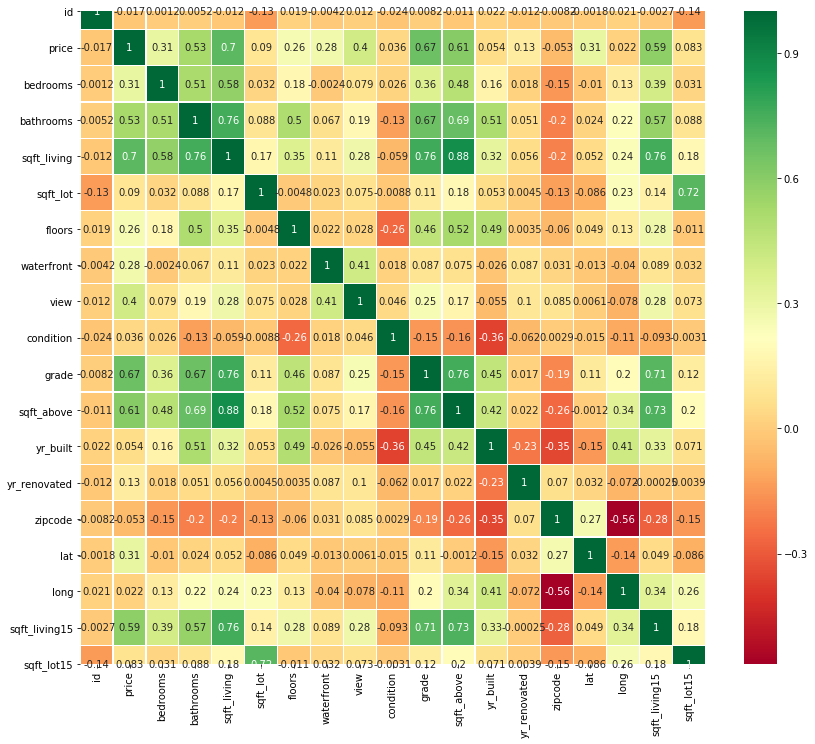

In [6]:
sns.heatmap(kc_data_copy.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

### What does the heatmap tell us
In the heatmap above the darker greens indicate high possitive correlation, and the dark reds show the negative correlation. We will use 0.75 and -0.75 as the thresholds in determining significant correlation.
####  'sqft_living' - strong correlations
It's easy to see that *sqft_living* has strong positive correlations with *sqft_above*, *sqft_basement*, *bedrooms*, *sqft_living15*, and *grade*.
#### 'grade' and 'sqft_above'
With a positive correlation of 0.76, the relationship between *grade* and *sqft_above* can be considerred strong.
### Can we remove any features based on our findings with respect to correlation?
#### Let's look closer at these relationships.
When we look carefully we can see that *sqft_living* is equal to the sum of *sqft_above* plus *sqft_basement*:

$sqft\_living = sqft\_above + sqft\_basement$

This means that we can describe *sqft_living* by adding the other two features. And if we drop it, we can reduce our instances of high correlation. But first we will need to make a change to *sqft_basement*.

As for the relationship between *sqft_above* and *grade*, we will keep both.
#### Let's confirm our observation
From the initial exploration, we can see that sqft_basement is of type 'object'. Let's convert it to type 'int'. But first we need to account for a sring value of '?', which was found when the first attempt to convert failed.

In [7]:
kc_data_copy['sqft_basement'].unique()[4]

'?'

In [8]:
kc_data_copy['sqft_basement'].replace('?','0.0',inplace=True)
kc_data_copy['sqft_basement'] = kc_data_copy['sqft_basement'].astype(str).astype(float).astype(int)

kc_data_copy[['sqft_living','sqft_above','sqft_basement']].describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_living,21597.0,2080.321850,918.106125,370.0,1430.0,1910.0,2550.0,13540.0
sqft_above,21597.0,1788.596842,827.759761,370.0,1190.0,1560.0,2210.0,9410.0
sqft_basement,21597.0,285.716581,439.819830,0.0,0.0,0.0,550.0,4820.0


### Plot 'sqft_above' plus 'sqft_basement' on top of 'sqft_living'
Plotting 'sqft_above' plus 'sqft_basement' on top of 'sqft_living' and reducing the opacity shows that they completely overlap. The blue plot is on the bottom and the yellow plot is on top. Together they blend into the purple color that we see. If there were any parts that did not overlap, they would show as either completely blue or yellow. This shows that they are the same. So, we should be able to remove 'sqft_above' or 'sqft_above because each can be derived by the other - either by subtracting or adding 'sqft_basement'. But we will continue to explore relationships before we decide.

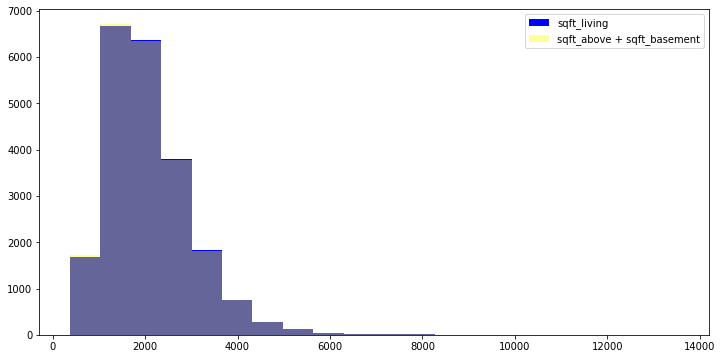

In [9]:
# Plot 'sqft_above' plus 'sqft_basement' on top of 'sqft_living'. 
plt.figure(figsize=(12,6))
plt.hist(kc_data_copy['sqft_living'], bins=20, color='blue', label='sqft_living')
plt.hist(kc_data_copy['sqft_above'] + kc_data_copy['sqft_basement'], bins=20, color='yellow', alpha=0.4, label='sqft_above + sqft_basement')
plt.legend()

#### Let's take another look at the heatmap. 
Now we can see that we have eliminated all of those high correlations just by removing one feature. Below, we remove 'sqft_living', but we did not do it in place. But we will do that later.

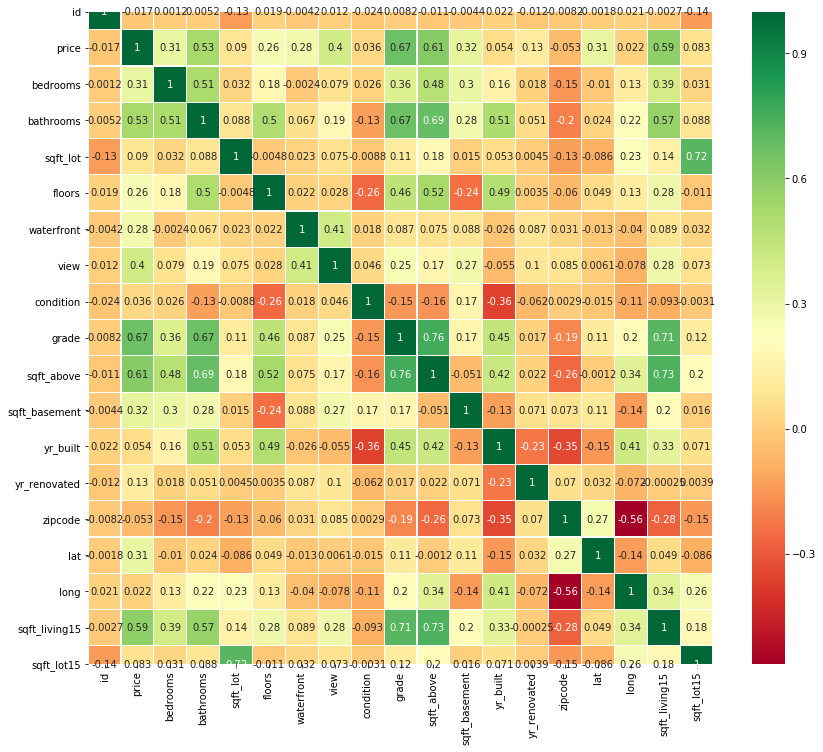

In [10]:
sns.heatmap(kc_data_copy.drop('sqft_living',axis=1).corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()

### Scatter Plots
Let's see what the relations to price for each feature look like.


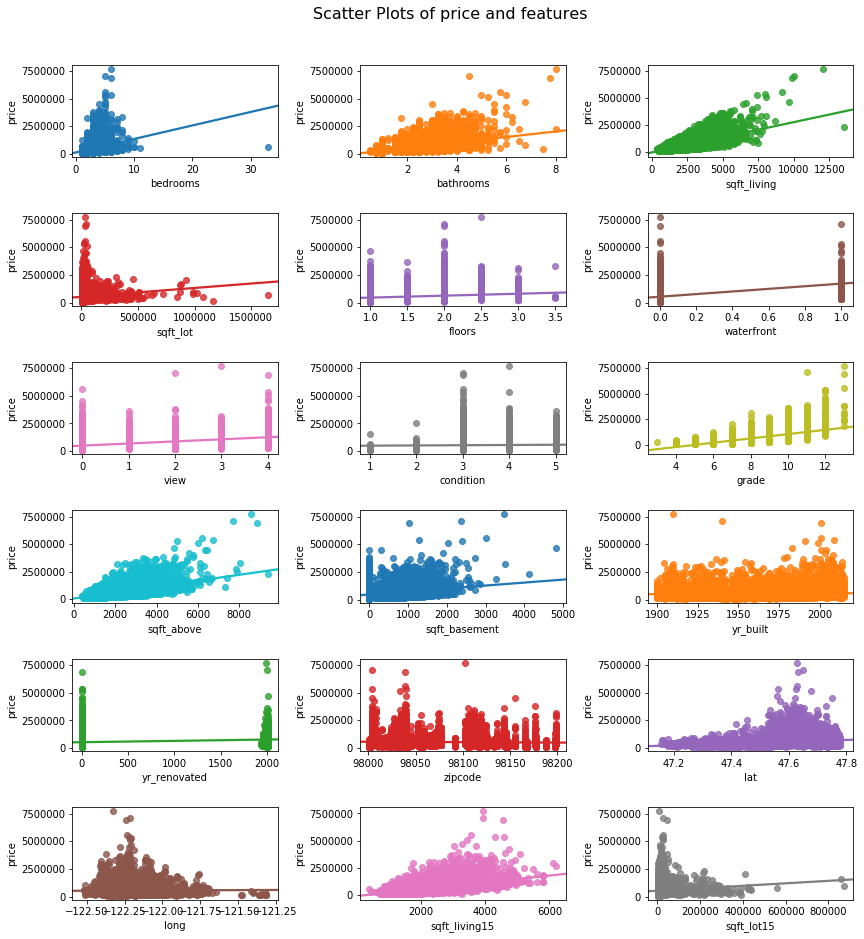

In [11]:
fig,ax = plt.subplots(figsize=(14,16), ncols=3, nrows=6)
fig.subplots_adjust(top=0.85)
fig.suptitle('Scatter Plots of price and features', y=0.9, fontsize=16)
cols = list(kc_data_copy.drop(['price','id','date'],axis=1).columns)
plt.subplots_adjust(wspace = 0.4, hspace = 0.6)
for i,c in enumerate(cols):
    sns.regplot(x=c, y='price', ci=None, data=kc_data_copy, ax=ax[i//3][i%3])
plt.savefig('Top 100 in profit by genre.png', dpi=300)    

#### Observations
It seems that there are a number of categorical features. These include *floors, waterfront, view, condition, grade, yr_renovated, and zipcode*. 

We will have to take a closer look at some of these variables. Looks like *bedrooms* would be a good place to start. The regression line shows a good positive correlation, but most points are bunched up between 0 and 11. There is also a very obvious outlier.

Then we'll take a closer look at bathrooms which has a much weaker positive correlation. 

The shape of *sqft_lot* most definitely requires a closer look. Due to how the point seem to stack up on the left side, it appears that the relationship is not very linear. Ditto all of this for *sqft_lot15*.

##### Let's start
#### Inspecting the zipcode
There are 70 *zipcodes* in Kings County. This high cardinality might make it difficult to use encoding schemes. We could use one hot encodinding, however that will increase our feature count by 68. We'll come back to this.

In [12]:
print(f'Total number of unique zipcodes: {kc_data["zipcode"].nunique()}')

Total number of unique zipcodes: 70


### Bedrooms
We can see below that there are two obvious outliers. So we'll compare the means when the the outliers are excluded. Checking the mean when values of 7 and greater are excluded leads to a very negligible difference.

In [13]:
bedroom_count = kc_data_copy['bedrooms'].value_counts()

In [14]:
print(f'The mean including outlier: {kc_data_copy["bedrooms"].mean()}\n'
      f'The mean excluding outlier: {kc_data_copy[kc_data_copy["bedrooms"] < 7]["bedrooms"].mean()}')
print(f'The price of the 33 bedroom house is {kc_data_copy[kc_data_copy["bedrooms"] == 33]["price"]}')      

The mean including outlier: 3.3731999814789093
The mean excluding outlier: 3.3597863942419317
The price of the 33 bedroom house is 15856    640000.0
Name: price, dtype: float64


#### Is it a categorical?
As we zoom in, the scatter plot shows that *bedrooms* might actually be better treated as a categorical variable. We will definitely have to consider this. 

It also shows that the suspicious 33 room entry is totally unreliable so we will get rid of it.

Text(0, 0.5, 'Price')

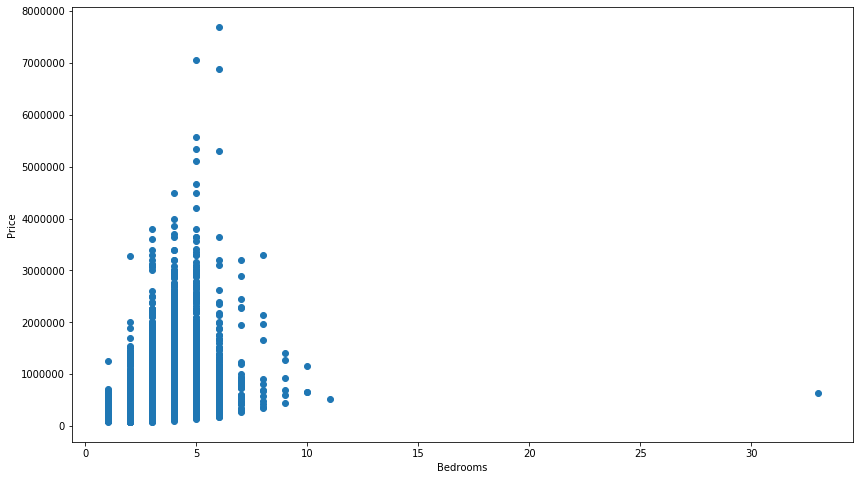

In [15]:
plt.figure(figsize=(14,8))
plt.scatter(kc_data_copy['bedrooms'],kc_data_copy['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')

Drop the outlier and see what the data looks like.

In [16]:
# Remove the outlier
kc_data_copy.drop(kc_data_copy[kc_data_copy["bedrooms"] == 33].index, inplace=True)

Text(0, 0.5, 'Price')

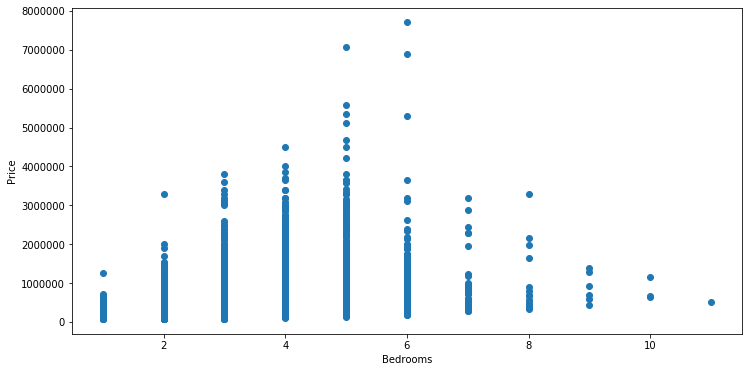

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(kc_data_copy['bedrooms'],kc_data_copy['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')

Now, that looks much better.

Now let's get a better idea of what the distribution looks like.

<BarContainer object of 11 artists>

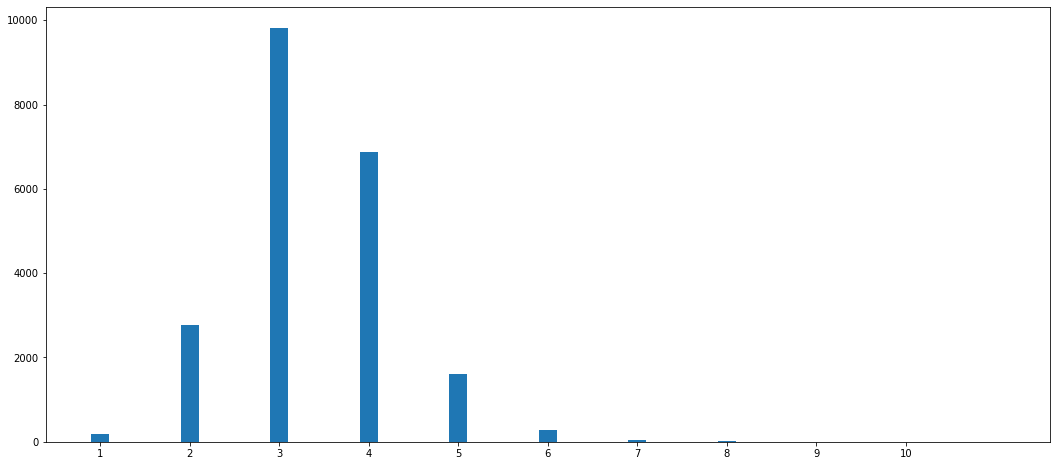

In [18]:
bed_by_count_to_plot = kc_data.bedrooms
plt.figure(figsize=(18,8))
plt.xticks(np.arange(0, 11))
my_x = np.array(kc_data_copy['bedrooms'].value_counts().sort_index(axis=0).index)
my_y = kc_data_copy['bedrooms'].value_counts().sort_index(axis=0).values
plt.bar(my_x, my_y, width=0.2)


#### Create a new categorical representation of bedrooms
Use the Pandas 'cut' function to bin the *bedrooms* feature, creating a categorical representation of the data. Doing so allows for encoding of the data. We use dummy encoding. This code is included in *preprocess_data()*.


In [19]:
bins = pd.IntervalIndex.from_tuples([(0, 2), (2, 3), (3,4), (4, 5), (5, 11)])
bds_bins = pd.cut(kc_data_copy['bedrooms'],bins)
bds_bins.categories = ['less than two bedroom','2 bedroom','3 bedroom','4 bedroom','5 or more bedroom']

bedroom_dummies = pd.get_dummies(bds_bins.cat.rename_categories(bds_bins.categories), drop_first=True)
bedroom_dummies


bedrooms,2 bedroom,3 bedroom,4 bedroom,5 or more bedroom
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
21592,1,0,0,0
21593,0,1,0,0
21594,0,0,0,0
21595,1,0,0,0


### Bathrooms
Before we get to the visualizations, let's look at the value counts.

In [20]:
bathroom_count = kc_data['bathrooms'].value_counts()
print(f'Bathrooms value counts: \n{bathroom_count.sort_index(axis=0)}')

Bathrooms value counts: 
0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3048
2.00    1930
2.25    2047
2.50    5377
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64


#### Let's have a closer look at the scatter plot for bathrooms
This zoomed in version of the chart show that this feature also shows up with the characteristics of a categorical feature. So, again as with *bedrooms*, we may have to convert it.

Text(0.5, 1.0, 'Price by number of bathrooms')

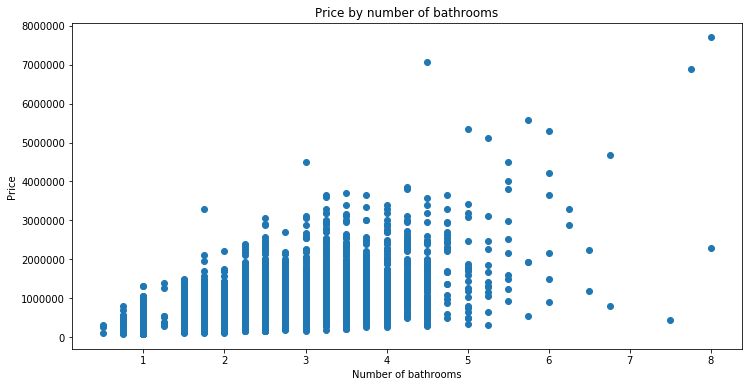

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(kc_data['bathrooms'],kc_data['price'])
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')
plt.title('Price by number of bathrooms')

<BarContainer object of 29 artists>

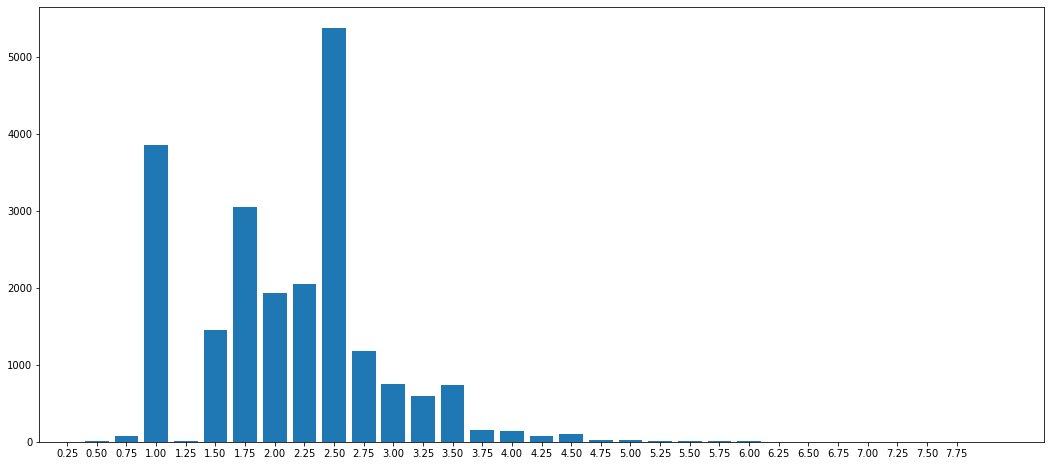

In [22]:
brs_by_count_to_plot = kc_data.bathrooms
plt.figure(figsize=(18,8))
plt.xticks(np.arange(0, 8, .25))
my_x = np.array(bathroom_count.sort_index(axis=0).index)
my_y = bathroom_count.sort_index(axis=0).values
plt.bar(my_x, my_y, width=0.2)

#### Categorize bathrooms
We again us pandas cut method to bin the feature values. I think that it would be worth it to create models using both the continuous and catergorized version of *bathrooms* and *bedrooms*. This code is included in *preprocess_data()*.

In [23]:

bins = pd.IntervalIndex.from_tuples([(0.0, 1.0), (1.0, 1.75), (1.75,2.5), (2.5, 3.0), (3.0, 3.75), (3.75,8)])
bth_bins = pd.cut(kc_data_copy['bathrooms'],bins)
bth_bins.categories = ['less than one bath','1 - 1.75 bath','1.75 - 2.5 bath','2.5 - 3.0 bath','3.0 - 3.75 bath', '3.75 bath and up']
bathroom_dummies = pd.get_dummies(bth_bins.cat.rename_categories(bth_bins.categories), drop_first=True)
bathroom_dummies


bathrooms,1 - 1.75 bath,1.75 - 2.5 bath,2.5 - 3.0 bath,3.0 - 3.75 bath,3.75 bath and up
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
21592,0,1,0,0,0
21593,0,1,0,0,0
21594,0,0,0,0,0
21595,0,1,0,0,0


### Now we explore waterfront
This is very obviously a binary feature - is this a waterfront property or not. We can see that most properties are not waterfront. 

First problem is that this feature is an int64 datatype. It has to be converted to categorical.

The second issues is that we have to account for 2376 missing values. We will handle that next.

In [24]:
kc_data_copy.waterfront.isnull().sum()

2376

#### How do we handle the missing values?
There are a number of ways to account for missing values. The easiest is to drop the rows that contain them. However, by dropping this number of values we can lose some meaning. 

Another way is to drop the feature if we can determine that it does not contribute sufficiently to the predictive power of the model.

Yet another is to impute the missing values with a statistical value such as the mean or median or some other value.

What I will do is to try estimate whether the property is a waterfront property based on the location coordinates. That is, I will map the waterfront properties and try to define bounding boxes around those properties. Let's call it a crude attempt at clustering. If a property is missing a value and it falls within one of the bounding boxes it will be given the proper value of '1.0'. Else, if it dose not fall within one, it will get '0.0'. Values for properties that already have a value will remain unchanged.
```python
def set_waterfront(s):
    '''
    Rough classifier based on where on the map waterfront properties appear.
    Takes a dataframe row and uses the 'lat' and 'long' fields to determine if they are within either of three bounding
    boxes that contain most of the waterfront properties.
    '''
    if pd.notna(s['waterfront']):
        return s['waterfront']

    elif (47.34 < s['lat'] < 47.6) and (-122.6 < s['long'] < -122.35):
        return 1.0
    elif (47.5 < s['lat'] < 47.78) and (-122.27 < s['long'] < -122.2):
        return 1.0
    elif (47.56 < s['lat'] < 47.66) and (-122.1 < s['long'] < -122.05):
        return 1.0
    else:
        return 0.0

```

### Plot of Kings County waterfront properties
First, let's plot the properties based on the *waterfront* feature. Below is what it looks like before we make any changes. The darker markers indicate the properties that are recorded as waterfront. I used this map to determine and define the bounding boxes that contain these properties. Then I  will apply them using the function set_waterfront() that I define above.

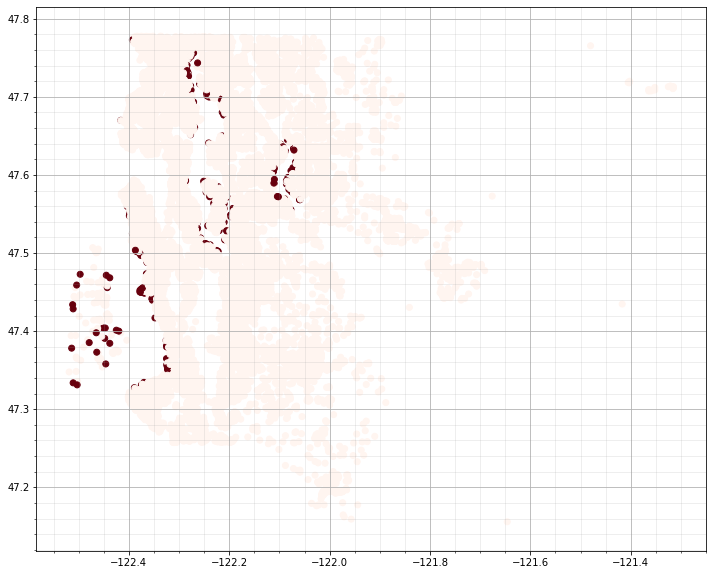

In [25]:
plt.figure(figsize=(12,10))
plt.scatter(kc_data_copy['long'],kc_data_copy['lat'],c=kc_data_copy['waterfront'], cmap='Reds')
plt.grid(b=True, which='major', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

### Convert NaNs to indicate if it is a waterfront property or not.
Using the set_waterfront() function, iterate over the dataframe and change the 'waterfront' values that contain 'NaN' to either 1 indicating waterfront, or 0 indicating not waterfront, based on whether thay fall into one of the bounding boxes of not.
#### set_waterfront()
This is where the bounding boxes are manually defined. If the value is not null, then it just returns the value. If it is null, the function will try to determine if it is located within one of the bounding boxes. If so, the function will return '1.0', else it will return '0.0'. The code is under '*source/resouces.py*'

In [26]:
kc_data_copy['waterfront'] = kc_data_copy.apply(lambda row: set_waterfront(row), axis=1)

### Plot the map again and check if the results are reasonable
We plot the map again to see the result. And the result is that a few more waterfront points show up in the general area of the other waterfront porperties and there are no nulls left.

There are now **0** null values

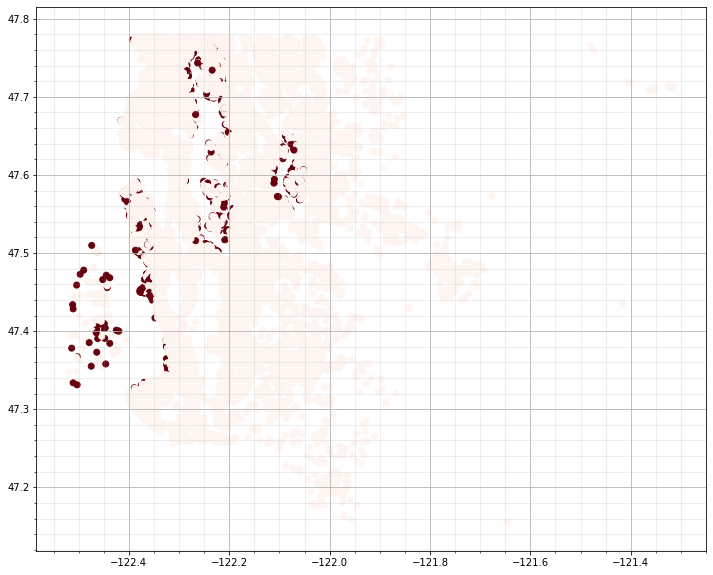

In [27]:
plt.figure(figsize=(12,10))
plt.scatter(kc_data_copy['long'],kc_data_copy['lat'],c=kc_data_copy['waterfront'], cmap='Reds')
plt.grid(b=True, which='major', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
md(f'There are now **{kc_data_copy.waterfront.isnull().sum()}** null values')

#### How'd we do?
So there are no more missing values for *waterfront*. And it looks like we did a pretty good job of estimating the dsignation of the property. 
#### Convert waterfront feature to categorical
We will now convert *waterfront* to type *categorical* and label encode it using cat.codes.

First, let's cast the data type to 'category'. Now that we have a proper category feature we can encode it.

In [28]:
kc_data_copy['waterfront'] = kc_data_copy['waterfront'].astype('category')
kc_data_copy['waterfront'] = kc_data_copy['waterfront'].cat.codes
kc_data_copy['waterfront'].value_counts()

0    21048
1      548
Name: waterfront, dtype: int64

 This above code is included in *preprocess_data()*.
### Now take a look at the date related fields
We'll start with 'yr_renovated'. This column has a datatype of 'float'. Above you can see that there are 3842 Null values that's 17.78% - pretty high. And below, we see that there are 17755 entries with actual values. However, of those, 17011 are values of 0.0. So we have only 744 records with actual values, with 379 recorded renovations since 2000. There really is no obvious way of approaching this. 

Perhaps, as this is a categorical value - renovated or not. We can bin based on how long since renovation, and have an 'unknown' category.

In [29]:
md(f'The missing values are **{round(3842 / len(kc_data_copy)*100,2)}%** of all records.')
kc_data_copy[kc_data_copy['yr_renovated'] >= 2000]['yr_renovated'].value_counts().sum()

The missing values are **17.79%** of all records.

379

In [30]:
with_vals = kc_data_copy[kc_data_copy['yr_renovated'].isnull() == False].shape[0]
with_zero = kc_data_copy[kc_data_copy['yr_renovated'] == 0.0].shape[0]

md(f"Number of records with values: **{with_vals}**")
md(f"Number of records with value 0.0: **{with_zero}**")
md(f'There are **{with_vals - with_zero}** useful values out of **{kc_data_copy.shape[0]}** records.')

Number of records with values: **17754**

Number of records with value 0.0: **17010**

There are **744** useful values out of **21596** records.

In [31]:
# This will be done by our preprocessing function
kc_data_copy['yr_renovated'] = kc_data_copy['yr_renovated'].apply(lambda x: 1 if x > 0 else -1 if np.isnan(x) else x).astype('category')
yr_reno_dummies = pd.get_dummies(kc_data_copy['yr_renovated'], prefix='cat_', drop_first=True)

This above code is included in *preprocess_data()*.

#### Now let's look at 'yr_built' 
This feature is of type int. There are no missing values, and all values are valid. 

In [32]:
kc_data_copy['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

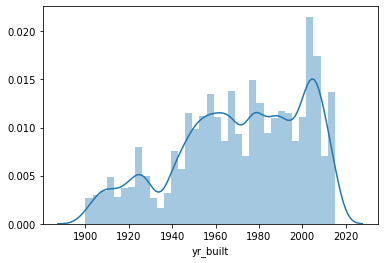

In [33]:
sns.distplot(kc_data_copy['yr_built'])

Text(0.5, 1.0, 'Price by Year Built')

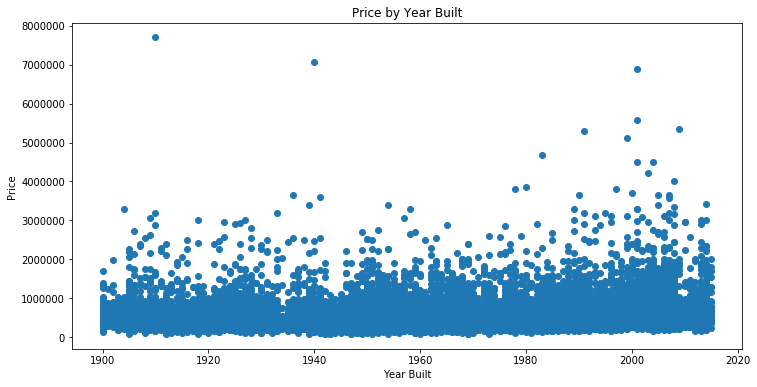

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(kc_data['yr_built'],kc_data['price'])
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Price by Year Built')

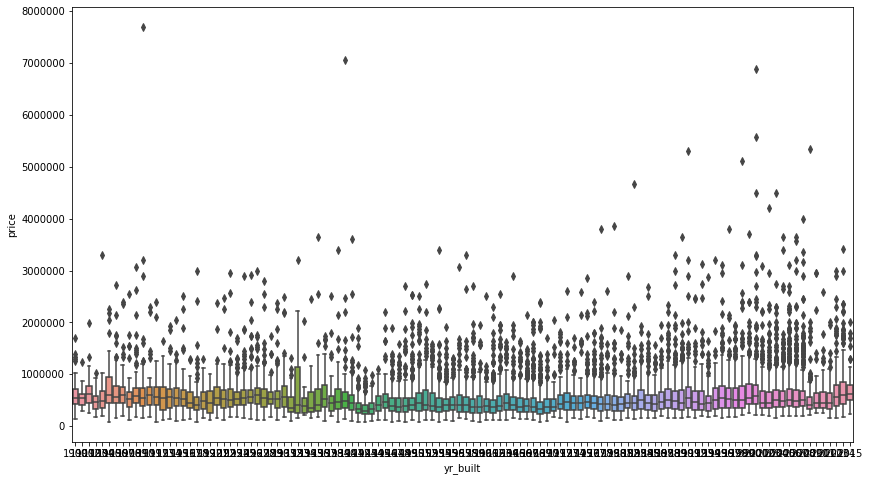

In [35]:
plt.figure(figsize=(14,8))
sns.boxplot(x='yr_built', y='price', data=kc_data_copy)

#### Let's take a look at the 'date' feature
This is a field of type 'object'. There are no missing values and all values are valid. But let's see what else we can find.

The scatter plot shows a sleightly negative slope. On its own, it dosen't seem to contribute much.




Text(0.5, 1.0, 'Price by Date Sold')

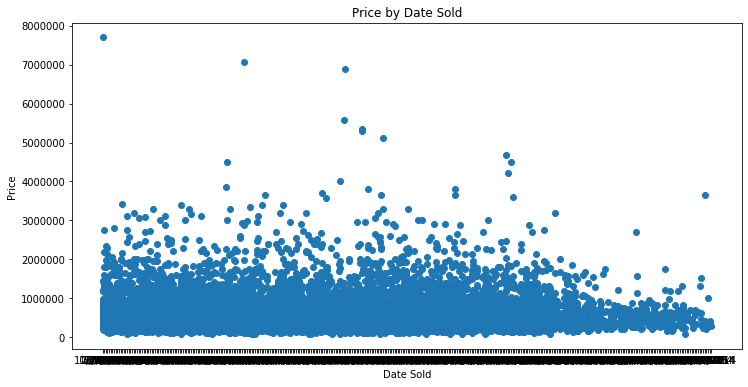

In [36]:
plt.figure(figsize=(12,6))
plt.scatter(x='date',y='price',data=kc_data_copy)
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.title('Price by Date Sold')

### Create 'age_when_sold' field
We will now create a new feature 'age_when_sold' by subtracting the 'yr_built' from the 'date' feature. We will then convert it to an int type. Let's just see if we can get any value from combining the features.

Based on the scatter plot, it dosen't that any of these features contribute much. Let's make them candidates to be dropped.

In [37]:
kc_data_copy['age_when_sold'] = pd.to_datetime(kc_data_copy['date']) - pd.to_datetime(kc_data_copy['yr_built'])

kc_data_copy['age_when_sold'] = kc_data_copy['age_when_sold'].dt.days

Text(0.5, 1.0, 'Price by Age')

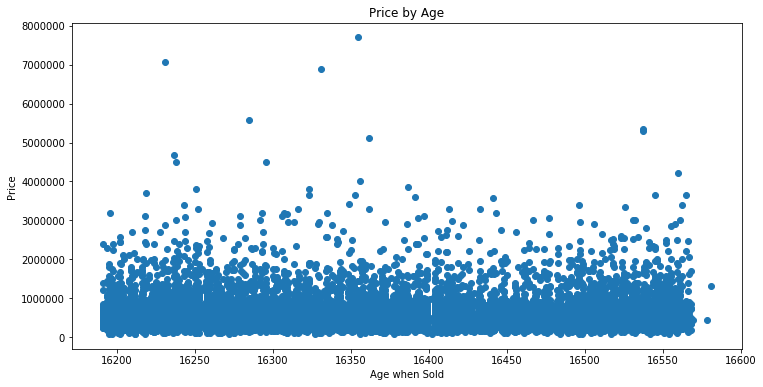

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(kc_data_copy['age_when_sold'],kc_data_copy['price'])
plt.xlabel('Age when Sold')
plt.ylabel('Price')
plt.title('Price by Age')

### Time to look at some continuous variables - sqft_lot first
This feature does not show a linear relationship with the price. This looks like a very good candidate for dropping. But first we'll see if there might be some strategy to transform this data in a way that it becomes more useful.

Text(0.5, 1.0, 'Price by Lot Square Foot')

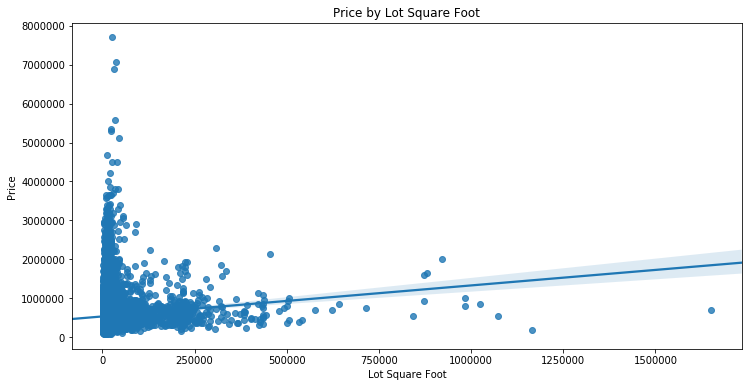

In [39]:
plt.figure(figsize=(12,6))
sns.regplot(x=kc_data_copy['sqft_lot'], y=kc_data_copy['price'])
plt.xlabel('Lot Square Foot')
plt.ylabel('Price')
plt.title('Price by Lot Square Foot')

### What happens if we transform this feature?
The charts below show how the feature changes through transformation. The top 3 depict the distribution plots for *sqft_lot* unchanged, log transformed, and square root transformed. We can see the log transformed version looks closer to normal than the other two. 

Next we see the scatter plots. Hmm. The log transformed seems to provide the best results, but not that much better.

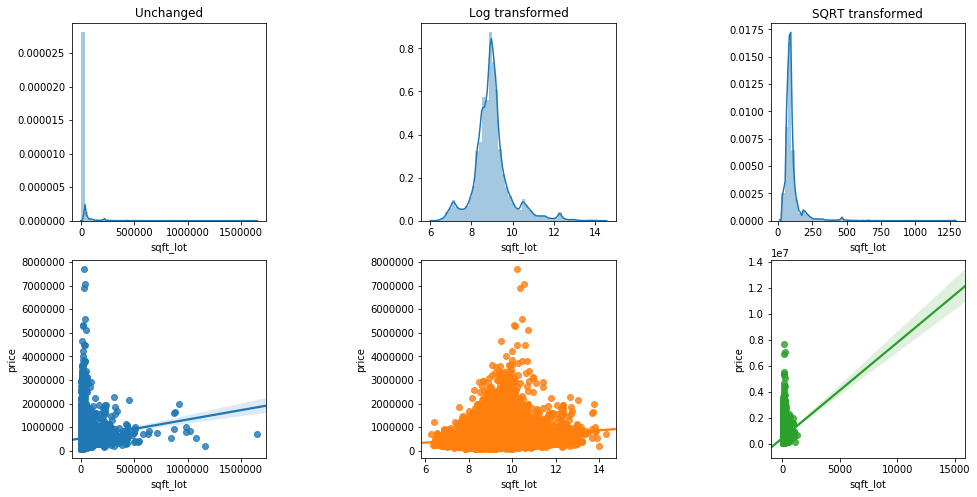

In [40]:
plot_trans(kc_data_copy['sqft_lot'], kc_data_copy['price'])

### How about sqft_lot15? 
This feature is very similar to *sqft_lot* so we can eliminate one or both.

### Let's have a look at sqft_living
We expect that this feature will be one of the most important in predicting price. It gives us the total square footage of the structure. Log transforming the feature gets us close to a normal destribution. However, there still remains significant heteroscedasticity. Do to this there might not be enough value to transforming the data.

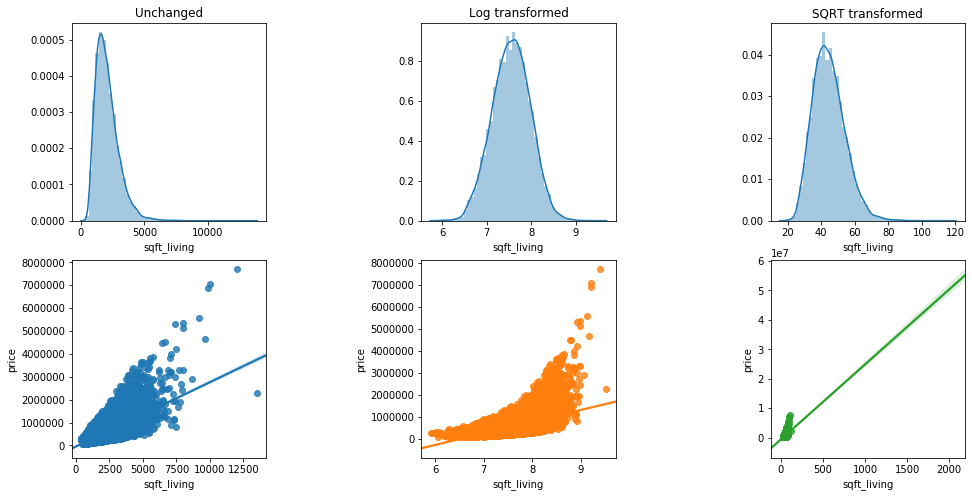

In [41]:
plot_trans(kc_data_copy['sqft_living'], kc_data_copy['price'])

### Let's have a look at sqft_above
Very similar to *sqft_living*. It gives us the total square footage of the structure without including the basement, if any. Log transforming the feature gets us close to a normal destribution. However, there still remains significant heteroscedasticity. Again, there might not be enough value to transforming the data. Stay tuned.

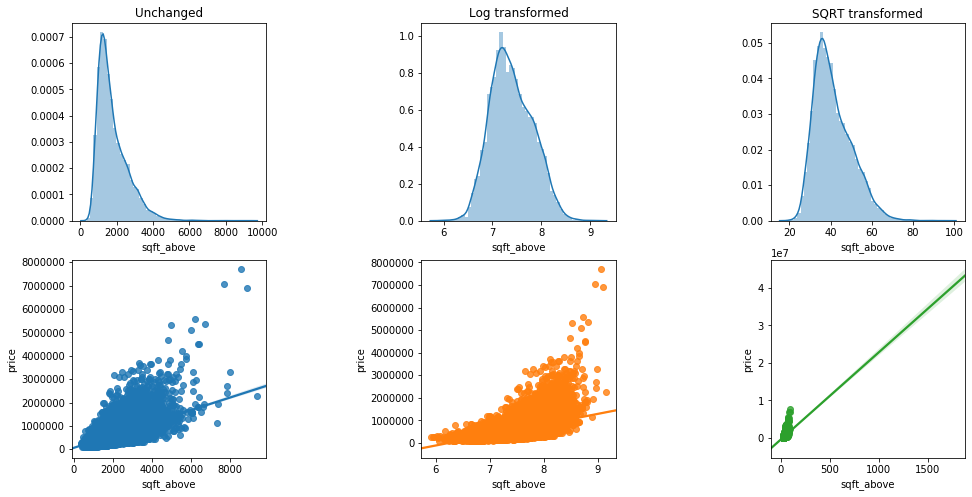

In [42]:
plot_trans(kc_data_copy['sqft_above'], kc_data_copy['price'])

### sqft_basement

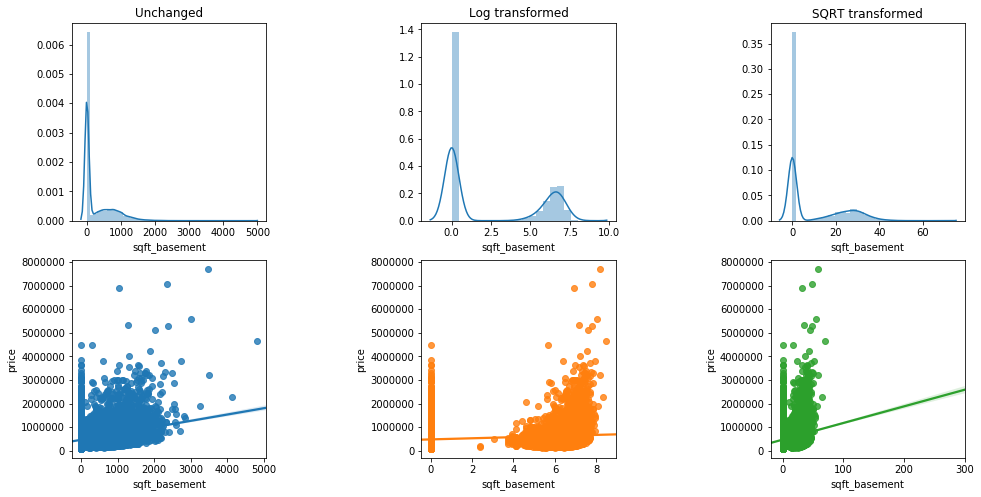

In [43]:
plot_trans(kc_data_copy['sqft_basement'], kc_data_copy['price'],z=1)
#kc_data_copy['sqft_basement'].value_counts()

## Now we are ready to preprocess the data.
So now that we have explored our data, it's time to wrangle it some. We will use the function **preprocess_data()**. it takes a predictor dataframe, a list of features to drop, a list of features to encode, and a boolean to transform or not the numerical data. I then returns our preprocessed dataframe. 

By changing the contents of the lists, we can try different combinations of features. For the initial baseline we will only drop the *view* and the *yr_renovated* features. All the other features will be treated as numerical.

To understand how the function works, check the code in '*source/resources.py*'. We will be using a number of times.

In [44]:
# Create a copy of the data
kc_traing_ds = kc_data.copy()

# We will treat all data as numeric for the baseline generation and drop 'view' and 'yr_renovated'
categorical = [ ]
to_drop = ['view','yr_renovated']

# Get the processed data
cleaned_train_base,_ = preprocess_data(kc_traing_ds,categorical,to_drop)

### Separate the targets from the predictors and create Train Test split
We are using *train_test_split* from sklearn to split our data into the training sets and test sets.

In [45]:
# Separate predictors and the target.
X = cleaned_train_base.drop('price',axis=1)
y = cleaned_train_base.iloc[:,-1]

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X, y, test_size=0.2, random_state=25)


### Generate a baseline model
Our baseline will be our simplest model. We are treating all of our data as numerical and only dropping *view* and *yr_renovated*.  As you'll recall, *yr_renovated* has many missing values and will not be suitable for this first model.

Our goal is to keep improving our score as we go.  We are using the adjusted $R^2$ to rank our models.

In [46]:

baseline = sm.OLS(y_train_base, sm.add_constant(pd.DataFrame(X_train_base))).fit()
md(f'baseline $R^2$ adjusted: **{round(baseline.rsquared_adj,3)}**,  number of features: **{X_train_base.shape[1]}**')
baseline.summary()

C:\Users\bigal\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


baseline $R^2$ adjusted: **0.678**,  number of features: **19**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1915.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:44:01   Log-Likelihood:            -1.1667e+05
No. Observations:               17277   AIC:                         2.334e+05
Df Residuals:                   17257   BIC:                         2.335e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2058.0350   3363.040     -0.612      0.541   -8649.935    4533.865
id             -1.34e-09   5.56e-10     -2.409      0.016   -2.43e-09    -2.5e-10
date          -1.279e-06   4.27e-07     -2.997      0.003   -2.12e-06   -4.43e-07
bedrooms        -45.1457      2.259    -19.984      0.000     -49.574     -40.718
bathrooms        47.1497      3.753     12.564      0.000      39.794      54.506
sqft_living      13.7299      2.072      6.626      0.000       9.669      17.791
sqft_lot          0.0189      0.005      3.547      0.000       0.008       0.029
floors           18.3528      4.125      4.449      0.000      10.267      26.439
waterfront      257.4833     10.002     25.743      0.000     237.878     277.089
condition        27.8054      2.672     10.406      0.000      22.568      33.043
grade           105.4842      2.486     42.428      0.000     100.611     110.357
sqft_above        3.8446      2.073      1.855      0.064      -0.218       7.907
sqft_basement     0.0363      0.021      1.767      0.077      -0.004       0.077
yr_built         -3.0268      0.079    -38.481      0.000      -3.181      -2.873
zipcode          -0.4762      0.038    -12.558      0.000      -0.551      -0.402
lat             549.4372     12.332     44.552      0.000     525.264     573.610
long           -211.7550     15.292    -13.847      0.000    -241.729    -181.781
sqft_living15     3.8464      0.395      9.732      0.000       3.072       4.621
sqft_lot15       -0.0423      0.009     -4.922      0.000      -0.059      -0.025
age_when_sold     0.1190      0.014      8.298      0.000       0.091       0.147
==============================================================================
Omnibus:                    13924.489   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           987099.679
Skew:                           3.378   Prob(JB):                         0.00
Kurtosis:                      39.408   Cond. No.                     1.15e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For our baseline we have an adjusted **$R^2$** of **$0.678$**. Can wee do better?
### Let's try to improve on that score
After trying different combinations of features, the following is the combination that gave the best scores. This was a trial and error excercise. I will be developing a routine to automate it. We will repeat the steps of preprocessing, splitting the data into train and test sets and fitting the model.
#### Model-1

In [47]:
categorical = [ 'waterfront','zipcode','bathrooms','condition','floors','yr_renovated']
to_drop = ['id','view','sqft_above', 'sqft_lot15','lat']
cleaned_train_2, _ = preprocess_data(kc_traing_ds,categorical,to_drop)

# Separate predictors and the target.
X = cleaned_train_2.drop('price',axis=1)
y = cleaned_train_2.iloc[:,-1]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=25)

model = sm.OLS(y_train_2, sm.add_constant(pd.DataFrame(X_train_2))).fit()
md(f'improved $R^2$ adjusted: **{round(model.rsquared_adj,3)}**,  number of featurs: **{X_train_2.shape[1]}**')
model.summary()

improved $R^2$ adjusted: **0.787**,  number of featurs: **96**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     664.2
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:44:09   Log-Likelihood:            -1.1308e+05
No. Observations:               17277   AIC:                         2.263e+05
Df Residuals:                   17180   BIC:                         2.271e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -2.72e+04   6450.294     -4.216      0.000   -3.98e+04   -1.46e+04
date             -6.734e-07   3.48e-07     -1.933      0.053   -1.36e-06     9.4e-09
bedrooms           -29.4192      1.897    -15.508      0.000     -33.138     -25.701
sqft_living         18.6866      0.364     51.324      0.000      17.973      19.400
sqft_lot             0.0192      0.003      5.723      0.000       0.013       0.026
grade               69.4999      2.143     32.428      0.000      65.299      73.701
sqft_basement       -0.0314      0.004     -7.314      0.000      -0.040      -0.023
yr_built            -0.6393      0.081     -7.926      0.000      -0.797      -0.481
long              -211.0270     52.655     -4.008      0.000    -314.236    -107.818
sqft_living15        3.7576      0.338     11.123      0.000       3.095       4.420
age_when_sold        0.1279      0.012     10.928      0.000       0.105       0.151
waterfront         250.5637      8.461     29.614      0.000     233.980     267.148
z__98002            34.4725     17.055      2.021      0.043       1.042      67.903
z__98003           -27.5107     15.403     -1.786      0.074     -57.701       2.680
z__98004           740.4336     15.152     48.868      0.000     710.735     770.133
z__98005           300.1979     18.459     16.263      0.000     264.017     336.378
z__98006           265.4758     14.774     17.969      0.000     236.518     294.434
z__98007           253.3191     19.831     12.774      0.000     214.449     292.189
z__98008           310.0777     17.038     18.199      0.000     276.681     343.475
z__98010           119.8194     25.624      4.676      0.000      69.594     170.044
z__98011           111.4752     16.988      6.562      0.000      78.177     144.773
z__98014           180.2745     30.227      5.964      0.000     121.027     239.522
z__98019           147.3704     23.724      6.212      0.000     100.870     193.871
z__98022            64.8046     21.644      2.994      0.003      22.381     107.228
z__98023           -53.7844     13.880     -3.875      0.000     -80.990     -26.579
z__98024           197.2927     30.513      6.466      0.000     137.484     257.102
z__98027           184.7698     18.137     10.187      0.000     149.219     220.321
z__98028            96.8323     14.981      6.464      0.000      67.468     126.196
z__98029           253.5820     20.087     12.624      0.000     214.209     292.955
z__98030            16.4822     15.981      1.031      0.302     -14.842      47.807
z__98031            24.5218     15.691      1.563      0.118      -6.233      55.277
z__98032            -7.2675     19.432     -0.374      0.708     -45.356      30.821
z__98033           358.9351     14.138     25.388      0.000     331.223     386.647
z__98034           209.

Now that's a pretty significant improvement.

We started out with 20 features and now that's grown to 96.  That's because we encoded six features, including *zipcode*, which on it's own contained 72 categories. It's worth noting that in the end, we did not encode *bedrooms*. That's because when we did, it lowered the score.

Cand we decrease these some. We'll try that next.

## Step wise feature selection
We have already done some feature selection when we decided on the predictors that have so far been used to test the model. However, here we will use step-wise feature selection to see if there are any other features that can be removed.y

The *stepwise_selection()* function can also be found in'*source/resources.py*'

In [48]:
results = stepwise_selection(X_train_2, list(y_train_2))

C:\Users\bigal\OneDrive\Documents\FlatIron\module_2_Final_Project\dsc-mod-2-project\source\resources.py:62: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  worst_feature = pvalues.argmax()


### Let's see what the difference is
Ok, so we start out with 96 features and the step-wise selection function keeps 75. So, according to these results, we need to drop 21 of them. We'll do that, fit the model again and see what we get.

In [49]:
# Number of features dropped
starting_num = len(X_train_2.columns)
resulting_num = len(results)
dif = starting_num - resulting_num
md(f'We started out with **{starting_num}** features and will reduce them to **{resulting_num}**, so we will drop **{dif}**')

We started out with **96** features and will reduce them to **75**, so we will drop **21**

So there now there will be 21 less features in our model. Now we will fit the model again, and compare the score.
### Model-2 using step-wise feature selection

In [50]:
X_train_stepped_down = X_train_2.copy()

# Create a list of features in our training set that are not in the step-wise selection results so that we can drop them.
to_drop = [c for c in X_train_stepped_down.columns if c not in results]

X_train_stepped_down.drop(to_drop, axis=1, inplace=True)

model = sm.OLS(list(y_train_2), sm.add_constant(pd.DataFrame(X_train_stepped_down))).fit()
md(f'The new $R^2$ adjusted: **{round(model.rsquared_adj,3)}**,  number of featurs: **{X_train_stepped_down.shape[1]}**')
model.summary()

The new $R^2$ adjusted: **0.786**,  number of featurs: **75**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     845.7
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:            -1.1312e+05
No. Observations:               17277   AIC:                         2.264e+05
Df Residuals:                   17201   BIC:                         2.270e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9984.0166   2197.801      4.543      0.000    5676.103    1.43e+04
bedrooms           -29.5748      1.887    -15.674      0.000     -33.273     -25.876
sqft_living         18.5655      0.361     51.362      0.000      17.857      19.274
sqft_lot             0.0192      0.003      5.788      0.000       0.013       0.026
grade               70.2719      2.132     32.959      0.000      66.093      74.451
sqft_basement       -0.0294      0.004     -7.069      0.000      -0.038      -0.021
yr_built            -0.6432      0.078     -8.213      0.000      -0.797      -0.490
long                92.6070     17.767      5.212      0.000      57.782     127.432
sqft_living15        3.8767      0.334     11.611      0.000       3.222       4.531
age_when_sold        0.1316      0.011     11.495      0.000       0.109       0.154
waterfront         252.1112      8.453     29.825      0.000     235.542     268.680
z__98003           -58.0398     12.564     -4.619      0.000     -82.667     -33.413
z__98004           677.1989     11.504     58.867      0.000     654.650     699.748
z__98005           225.6684     15.015     15.030      0.000     196.238     255.099
z__98006           184.1082      9.423     19.538      0.000     165.638     202.578
z__98007           171.8089     16.190     10.612      0.000     140.074     203.544
z__98008           221.0528     11.738     18.832      0.000     198.045     244.061
z__98011            46.8357     13.857      3.380      0.001      19.674      73.997
z__98022           -60.8503     13.480     -4.514      0.000     -87.273     -34.428
z__98023           -67.9371      9.999     -6.795      0.000     -87.536     -48.339
z__98027            72.1179     10.001      7.211      0.000      52.515      91.721
z__98028            46.2009     11.880      3.889      0.000      22.915      69.487
z__98029           129.6587     11.299     11.475      0.000     107.512     151.806
z__98030           -50.1006     12.438     -4.028      0.000     -74.480     -25.721
z__98031           -42.6361     12.012     -3.550      0.000     -66.180     -19.092
z__98032           -47.6781     17.278     -2.759      0.006     -81.545     -13.811
z__98033           290.4419      9.791     29.665      0.000     271.251     309.633
z__98034           147.2686      8.969     16.420      0.000     129.689     164.848
z__98038           -34.6080      8.713     -3.972      0.000     -51.685     -17.531
z__98039          1119.6409     28.324     39.530      0.000    1064.123    1175.159
z__98040           415.4379     11.978     34.682      0.000     391.959     438.917
z__98042           -57.7095      8.778     -6.574      0.000     -74.915     -40.504
z__98052           152.3051      8.632     17.645      0.000     135.386     169.224
z__98053           111.

#### Result of feature selection
The previous adjusted **$R^2$** was **0.787**. The new adjusted **$R^2$** is **0.786**, a very sleight drop. Given that we have managed to reduce the complexity of the model by 21 features, we'll take the reduction of **0.001**.

### Interactions
We've done pretty well so far, but let's see if we can improve it a bit more. We are now going to search for interactive terms. The **exp_interactions()** function will handle the heavy lifting. Do to the shear number of features, it will take some time to complete. We will use the adjusted '$R^2$' score to rank them.

In [51]:
top_5_interactions = exp_interactions(X_train_2,y_train_2)

top_5_interactions

[('sqft_living', 'grade', 0.809),
 ('sqft_living', 'waterfront', 0.8),
 ('grade', 'sqft_basement', 0.798),
 ('grade', 'waterfront', 0.797),
 ('sqft_living15', 'waterfront', 0.795)]

### Interaction visualizations
We will now plot the top 4 interaction terms.
#### sqft_living and grade

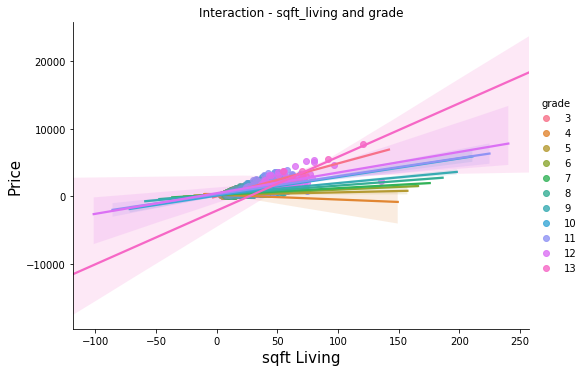

In [52]:
temp_df = pd.concat([y_train_2,X_train_2],axis=1)
lm = sns.lmplot(y='price', x='sqft_living', hue='grade', data=temp_df, height=5, aspect=1.5)
ax = plt.gca()
ax.set_title('Interaction - sqft_living and grade')
ax.set_xlabel('sqft Living', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax = lm.axes
#ax[0,0].set_ylim(temp_df['price'].min()-1000000,temp_df['price'].max())
#ax[0,0].set_xlim(-20,)

#### sqft_living and waterfront

Text(27.164531250000003, 0.5, 'Price')

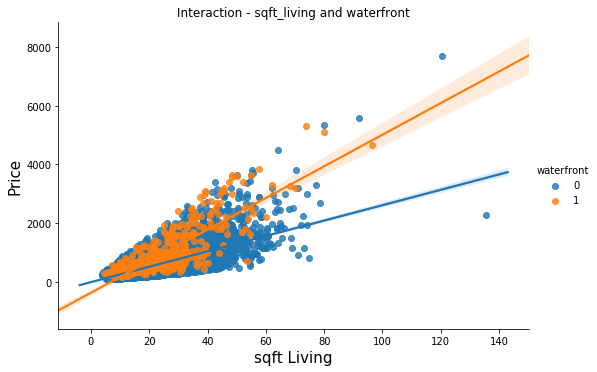

In [53]:
sns.lmplot(y='price', x='sqft_living', hue='waterfront', data=temp_df, height=5, aspect=1.5)
ax = plt.gca()
ax.set_title('Interaction - sqft_living and waterfront')
ax.set_xlabel('sqft Living', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

#### sqft_living and number of bathrooms from 3.7 and up

Text(32.136805555555554, 0.5, 'Price')

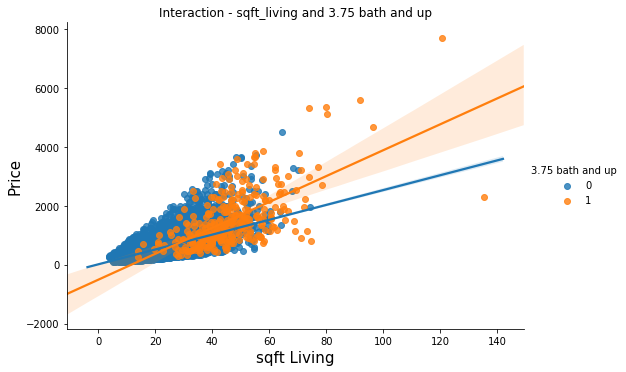

In [54]:
sns.lmplot(y='price', x='sqft_living', hue='3.75 bath and up', data=temp_df, height=5, aspect=1.5)
ax = plt.gca()
ax.set_title('Interaction - sqft_living and 3.75 bath and up')
ax.set_xlabel('sqft Living', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

#### sqft_basement and grade

Text(26.69513888888889, 0.5, 'Price')

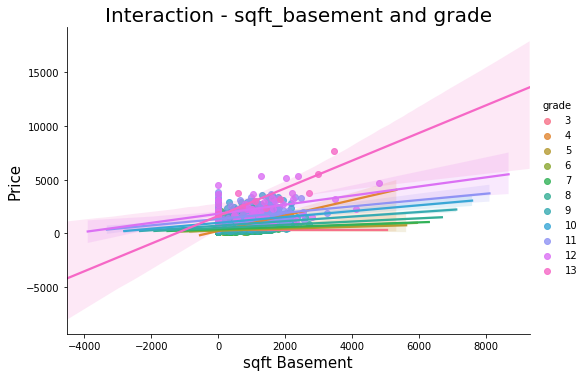

In [55]:
sns.lmplot(y='price', x='sqft_basement', hue='grade', data=temp_df, height=5, aspect=1.5)
ax = plt.gca()
ax.set_title('Interaction - sqft_basement and grade',fontsize=20)
ax.set_xlabel('sqft Basement', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

### Add the interaction terms to our model
Now we will add the interaction terms to our previous model to see what the effect is. The function **add_interactions()** creates the interaction terms. Here we are passing the top 5 interactions. Please refer to the function itself for furthur understanding.
### Model-3 using interactions

In [56]:
# Create the interactions and model
X_train_inter = add_interactions(X_train_2,top_5_interactions)

# Do step-wise feature selection
results2 = stepwise_selection(X_train_inter, list(y_train_2))

X_train_stepped_down_2 = X_train_inter.copy()

# Create a list of features in our training set that are not in the step-wise selection results so that we can drop them.
to_drop = [c for c in X_train_stepped_down_2.columns if c not in results2]

# Drop the features
X_train_stepped_down_2.drop(to_drop, axis=1, inplace=True)


model = sm.OLS(list(y_train_2), sm.add_constant(pd.DataFrame(X_train_stepped_down_2))).fit()
md(f'The $R^2$ adjusted: **{round(model.rsquared_adj,3)}**,  number of features: **{X_train_stepped_down_2.shape[1]}**')
model.summary()

C:\Users\bigal\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\bigal\OneDrive\Documents\FlatIron\module_2_Final_Project\dsc-mod-2-project\source\resources.py:62: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  worst_feature = pvalues.argmax()


The $R^2$ adjusted: **0.828**,  number of features: **82**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1016.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:50:34   Log-Likelihood:            -1.1121e+05
No. Observations:               17277   AIC:                         2.226e+05
Df Residuals:                   17194   BIC:                         2.232e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1018.6243    217.452     -4.684      0.000   -1444.852    -592.397
bedrooms                    -7.1831      1.743     -4.122      0.000     -10.599      -3.768
sqft_living                -16.5958      0.996    -16.659      0.000     -18.548     -14.643
sqft_lot                     0.0191      0.003      6.473      0.000       0.013       0.025
grade                      -26.9632      2.922     -9.229      0.000     -32.690     -21.236
sqft_basement               -0.2442      0.019    -12.875      0.000      -0.281      -0.207
yr_built                    -0.4800      0.070     -6.835      0.000      -0.618      -0.342
sqft_living15                3.9768      0.307     12.945      0.000       3.375       4.579
age_when_sold                0.1322      0.010     12.888      0.000       0.112       0.152
waterfront                -502.4524     50.670     -9.916      0.000    -601.772    -403.133
z__98003                   -35.0555     10.909     -3.214      0.001     -56.438     -13.673
z__98004                   696.7743     10.307     67.601      0.000     676.571     716.977
z__98005                   277.1975     13.458     20.598      0.000     250.819     303.576
z__98006                   219.5408      8.486     25.872      0.000     202.908     236.174
z__98007                   216.1023     14.507     14.897      0.000     187.667     244.537
z__98008                   252.8741     10.516     24.046      0.000     232.261     273.487
z__98011                    93.4052     12.379      7.546      0.000      69.141     117.669
z__98014                    66.3319     15.931      4.164      0.000      35.105      97.559
z__98019                    70.2916     12.820      5.483      0.000      45.163      95.420
z__98023                   -48.2408      8.172     -5.903      0.000     -64.260     -32.222
z__98024                   123.8195     19.621      6.311      0.000      85.360     162.279
z__98027                   127.7204      8.913     14.329      0.000     110.250     145.191
z__98028                    93.7739     10.520      8.914      0.000      73.153     114.394
z__98029                   194.0812      9.969     19.469      0.000     174.541     213.621
z__98033                   320.1789      8.747     36.606      0.000     303.035     337.323
z__98034                   185.6417      7.971     23.290      0.000     170.018     201.265
z__98039                  1072.5835     25.401     42.226      0.000    1022.794    1122.373
z__98040                   398.5610     10.723     37.168      0.000     377.542     419.580
z__98042                   -23.9723      7.857     -3.051      0.002     -39.372      -8.573
z__98045                    76.1755     12.053      6.320      0.000      52.551      99.800
z__98052      

In [57]:
len(results2), X_train_inter.shape[1]

(82, 101)

#### Another big improvement!
So now we have gotten the score to rise again. The last model produced an adjusted **$R^2$** of **0.786**. This latest version scores **0.828**. Not bad. We also drop down from 101 features to 84... Double nice!

### Transform before finding interactions
Now we try log transforming the numerical features and scale them using **min-max**. Here, we go through all of the steps. First we pass the data to the **pre_process_data()** function. Then the data is separated into predictors and target, and then split into training and test sets. Next, we add the previously created interactions, do step-wise feature selection to reduce the number of features. Finally, we run fit the model.
### Model-4 using log transformation and min-max scaling

In [58]:
# Preprocess data with transformation - trans=True
categorical = [ 'waterfront','zipcode','bathrooms','condition','floors','yr_renovated']
to_drop = ['id','view','sqft_above', 'sqft_lot15','lat']
cleaned_train_3, _ = preprocess_data(kc_traing_ds,categorical,to_drop, trans=True)

# Separate predictors and the target.
X = cleaned_train_3.drop('price',axis=1)
y = cleaned_train_3.iloc[:,-1]

# Split the data to train, test datasets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=25)

# Add previously created interactions
X_train_inter_3 = add_interactions(X_train_3,top_5_interactions)

# Do step-wise feature selection
results3 = stepwise_selection(X_train_inter_3, list(y_train_3))

# Make a copy of the data so as not to change the original
X_train_stepped_down_3 = X_train_inter_3.copy()

# Create a list of features in our training set that are not in the step-wise selection results so that we can drop them.
to_drop = [c for c in X_train_stepped_down_3.columns if c not in results3]

# Drop the features
X_train_stepped_down_3.drop(to_drop, axis=1, inplace=True)

# Fit the model
model = sm.OLS(list(y_train_3), sm.add_constant(pd.DataFrame(X_train_stepped_down_3))).fit()
md(f'The $R^2$ adjusted: **{round(model.rsquared_adj,3)}**,  number of featurs: **{X_train_stepped_down_3.shape[1]}**')
model.summary()

The $R^2$ adjusted: **0.812**,  number of featurs: **78**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     956.0
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:56:27   Log-Likelihood:            -1.1200e+05
No. Observations:               17277   AIC:                         2.242e+05
Df Residuals:                   17198   BIC:                         2.248e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      731.5582     27.878     26.241      0.000     676.915     786.202
bedrooms                   -79.1710     22.771     -3.477      0.001    -123.804     -34.538
sqft_living              -2207.4339     62.214    -35.481      0.000   -2329.379   -2085.488
sqft_lot                   195.8151     15.326     12.776      0.000     165.774     225.856
grade                    -1678.0417     46.718    -35.919      0.000   -1769.614   -1586.470
sqft_basement             -287.4324     22.127    -12.990      0.000    -330.803    -244.062
yr_built                   -30.6271      7.763     -3.945      0.000     -45.844     -15.410
sqft_living15              124.1455     17.529      7.082      0.000      89.788     158.503
age_when_sold               50.3086      4.185     12.022      0.000      42.106      58.511
waterfront                -897.8544     42.361    -21.195      0.000    -980.887    -814.822
z__98003                   -33.5690     11.370     -2.952      0.003     -55.855     -11.283
z__98004                   706.0009     10.735     65.767      0.000     684.960     727.042
z__98005                   267.3228     14.032     19.052      0.000     239.819     294.826
z__98006                   219.0800      8.814     24.855      0.000     201.803     236.357
z__98007                   213.8031     15.160     14.103      0.000     184.088     243.518
z__98008                   256.8183     10.962     23.428      0.000     235.331     278.305
z__98011                    90.4566     12.926      6.998      0.000      65.121     115.792
z__98019                    56.7998     13.392      4.241      0.000      30.550      83.050
z__98023                   -51.8851      8.499     -6.105      0.000     -68.544     -35.226
z__98024                   104.5977     20.525      5.096      0.000      64.367     144.828
z__98027                   117.9417      9.276     12.714      0.000      99.759     136.125
z__98028                    87.0205     10.969      7.933      0.000      65.520     108.521
z__98029                   196.5929     10.415     18.876      0.000     176.178     217.007
z__98033                   320.6342      9.124     35.141      0.000     302.750     338.519
z__98034                   187.2016      8.288     22.587      0.000     170.956     203.447
z__98039                  1110.0314     26.551     41.808      0.000    1057.989    1162.074
z__98040                   403.8592     11.165     36.171      0.000     381.974     425.745
z__98042                   -25.6298      8.171     -3.137      0.002     -41.646      -9.614
z__98045                    68.3790     12.611      5.422      0.000      43.661      93.097
z__98052                   202.0227      8.085     24.987      0.000     186.175     217.870
z__98053      

#### Results
This time the adjusted **$R^2$** value drops to **0.810**. Still a solid score, but I might stick with the previous model. We'll determine that in a moment.

## Cross validation
We will test the predictability  of our best models using the SKLearn library. We will use Cross-Validation to accomplish this.
### First up, Model 3
Model 3 gave us the highest adjusted $R^2$. Now we will use RMSE as our measure.

In [59]:
kc_model = LinearRegression()

In [91]:
# We are validating Model-3 which gave us the best R^2 score.
X_train_final = X_train_stepped_down_2
y_train_final = y_train_2.copy()
kc_model.fit(X_train_final,y_train_final)

k_fold = KFold(n_splits=10, shuffle=True, random_state=27)
model_3 = cross_val_score(kc_model, X_train_final, y_train_final, cv=k_fold, scoring='neg_mean_squared_error')
RMSE = np.sqrt(-model_3.mean())
md(f'RMSE: **{RMSE}**')
md(f'#### Thes are the regression coefficients')
model_3_coef = pd.DataFrame({'features':X_train_final.columns, 'coef':kc_model.coef_}).set_index('features')
model_3_coef.T

RMSE: **153.1249260445591**

#### Thes are the regression coefficients

features,bedrooms,sqft_living,sqft_lot,grade,sqft_basement,yr_built,sqft_living15,age_when_sold,waterfront,z__98003,...,condition__5,floors__2.0,floors__2.5,floors__3.0,renovated,sqft_living:grade,sqft_living:waterfront,grade:sqft_basement,grade:waterfront,sqft_living15:waterfront
coef,-7.183133,-16.59577,0.019089,-26.963191,-0.244238,-0.479957,3.976826,0.13223,-502.452439,-35.055496,...,77.95271,-14.0246,59.023674,-48.996228,69.979576,3.74898,13.727661,0.027027,23.718667,9.893208


In [93]:
idxs = model_3_coef.sort_values(by='coef', ascending=False).index
vals = model_3_coef.sort_values(by='coef', ascending=False).values
md(f'#### Top 10 coefficents')
coef_dict = {i:v[0] for i,v in zip(idxs,vals)}
list(coef_dict.items())[:10]

#### Top 10 coefficents

[('z__98039', 1072.58351007878),
 ('z__98004', 696.7743244771689),
 ('z__98112', 579.2760030125115),
 ('z__98119', 483.8705458926374),
 ('z__98109', 482.150452053203),
 ('z__98102', 471.5568581793399),
 ('z__98105', 439.91806089689317),
 ('z__98040', 398.5609745162624),
 ('z__98199', 362.7243920940504),
 ('z__98107', 326.10843962235737)]

### Make predictions with the test set
Let's try making predictions with the test data and compare the results to those of the training data. But first we will prepare the test set. We will add the interaction terms, and remove the features identified by the step-wise process. Then we will make predictions with both sets and compare their RMSE scores.

In [92]:
# Add interactions
X_test_2_inter = add_interactions(X_test_2,top_5_interactions)

# Do step-wise feature selection
#results = stepwise_selection(X_test_2_inter, list(y_test_2))

X_test_stepped_down = X_test_2_inter.copy()

# Create a list of features in our training set that are not in the step-wise selection results so that we can drop them.
to_drop = [c for c in X_test_stepped_down.columns if c not in results2]

# Drop the features
X_test_stepped_down.drop(to_drop, axis=1, inplace=True)

X_test_final = X_test_stepped_down.copy()
y_test_final = y_test_2

# Make the predictions
y_hat_train = kc_model.predict(X_train_final)
y_hat_test = kc_model.predict(X_test_final)

# Compare the scores
train_mse = mean_squared_error(y_train_final, y_hat_train)
test_mse = mean_squared_error(y_test_final, y_hat_test)
md(f'Train RMSE: **{np.sqrt(train_mse)}**')
md(f'Test RMSE: **{np.sqrt(test_mse)}**')

Train RMSE: **151.11939985981815**

Test RMSE: **151.8611772433871**

The scores are quite close which means that varience is not a concern.

### Polynomial Model
Now we will fit the same data to a $2^{nd}$ degree polynomial model. We want to see whether this will gives us a better model.

In [62]:
degree = 2
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree)

# Fit and transform X_train
X_poly_train = poly.fit_transform(X_train_final)

# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train_final)

# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test_final)

# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)

# Evaluate model performance on test data
rmse_train = np.sqrt(mean_squared_error(y_test_final, y_pred))
md(f"{degree}nd degree poly      $R^2$ is **{r2_score(y_test_final, y_pred)}**   RMSE is **{rmse_train}**")


X_full = pd.concat([X_train_final, X_test_final])
# Transform the full data
X_poly = poly.transform(X_full)

# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

2nd degree poly      $R^2$ is **0.7004992698010373**   RMSE is **205.32426839391906**

As shown above, the $R^2$ is lower than our previous model, while the RMSE is higher. Therefore we will not use this model.

### Model 4 
Now we will evaluate our model with transformation.

In [89]:
X_train_final_2 = X_train_stepped_down_3
y_train_final_2 = y_train_3.copy()
kc_model.fit(X_train_final_2,y_train_final_2)

k_fold = KFold(n_splits=10, shuffle=True, random_state=27)
mse = np.mean(cross_val_score(kc_model, X_train_final_2, y_train_final_2, cv=k_fold, scoring='neg_mean_squared_error'))
md(f'RMSE: **{np.sqrt(-mse)}**')

RMSE: **160.04673318351126**

This RMSE is a bit higher than model 3.
#### Make predictions with the test set
As we did before, we will prep the test set and use it to make predictions using model 4. Then we will compare the scores.

In [90]:
X_test_3_inter = add_interactions(X_test_3,top_5_interactions)

# Do step-wise feature selection
#results = stepwise_selection(X_test_2_inter, list(y_test_2))

X_test_stepped_down_3 = X_test_3_inter.copy()

# Create a list of features in our training set that are not in the step-wise selection results so that we can drop them.
to_drop = [c for c in X_test_stepped_down_3.columns if c not in results3]

# Drop the features
X_test_stepped_down_3.drop(to_drop, axis=1, inplace=True)

X_test_final_2 = X_test_stepped_down_3.copy()
y_test_final_2 = y_test_3

# Make the predictions
y_hat_train_2 = kc_model.predict(X_train_final_2)
y_hat_test_2 = kc_model.predict(X_test_final_2)

train_mse_2 = mean_squared_error(y_train_final_2, y_hat_train_2)
test_mse_2 = mean_squared_error(y_test_2, y_hat_test_2)
md(f'Train RMSE: **{np.sqrt(train_mse_2)}**')
md(f'Test RMSE: **{np.sqrt(test_mse_2)}**')

Train RMSE: **158.1779239663151**

Test RMSE: **167.32498396563918**

Again, these scores are higher than model 3 and a little bit furthur apart
### Model 2
This model had and adjusted $R^2$ of **0.786**. Interactions were not applied, as they were for model 3. 

In [85]:
# We are validating Model-3 which gave us the best R^2 score.
X_train_final_3 = X_train_stepped_down
y_train_final_3 = y_train_2.copy()
kc_model.fit(X_train_final_3,y_train_final_3)

k_fold = KFold(n_splits=10, shuffle=True, random_state=27)
model_2 = cross_val_score(kc_model, X_train_final_3, y_train_final_3, cv=k_fold, scoring='neg_mean_squared_error')
RMSE = np.sqrt(-model_2.mean())
md(f'RMSE: **{RMSE}**')
model_2_coef = pd.DataFrame({'features':X_train_final_3.columns, 'coef':kc_model.coef_}).set_index('features')


RMSE: **170.51422964548715**

In [87]:
X_test_stepped_down = X_test_2.copy()

# Create a list of features in our training set that are not in the step-wise selection results so that we can drop them.
to_drop = [c for c in X_test_stepped_down.columns if c not in results]

# Drop the features
X_test_stepped_down.drop(to_drop, axis=1, inplace=True)

X_test_final = X_test_stepped_down.copy()
y_test_final = y_test_2

# Make the predictions
y_hat_train = kc_model.predict(X_train_final_3)
y_hat_test = kc_model.predict(X_test_final)

# Compare the scores
train_mse = mean_squared_error(y_train_final_3, y_hat_train)
test_mse = mean_squared_error(y_test_final, y_hat_test)
md(f'Train RMSE: **{np.sqrt(train_mse)}**')
md(f'Test RMSE: **{np.sqrt(test_mse)}**')
md(f'Again, these scores are higher than model 3 and a little bit furthur apart.')
md(f'#### Below are the regression coefficients')
model_2_coef = pd.DataFrame({'features':X_train_final_3.columns, 'coef':kc_model.coef_}).set_index('features')
model_2_coef.T

Train RMSE: **168.7628900721752**

Test RMSE: **177.5404931143193**

Again, these scores are higher than model 3 and a little bit furthur apart.

#### Below are the regression coefficients

features,bedrooms,sqft_living,sqft_lot,grade,sqft_basement,yr_built,long,sqft_living15,age_when_sold,waterfront,...,1.75 - 2.5 bath,2.5 - 3.0 bath,3.0 - 3.75 bath,3.75 bath and up,condition__3,condition__5,floors__2.0,floors__2.5,floors__3.0,renovated
coef,-29.574835,18.565482,0.01915,70.27194,-0.029421,-0.643164,92.606977,3.876712,0.13161,252.111205,...,-39.090582,-41.90406,23.951478,211.937537,-24.72993,52.750061,-22.709615,84.143933,-39.040628,68.418573


In [82]:
idxs = model_2_coef.sort_values(by='coef', ascending=False).index
vals = model_2_coef.sort_values(by='coef', ascending=False).values
md(f'#### Top 10 coefficents')
coef_dict = {i:v[0] for i,v in zip(idxs,vals)}
list(coef_dict.items())[:10]

#### Top 10 coefficents

[('z__98039', 1119.6409208089135),
 ('z__98004', 677.1989336132837),
 ('z__98112', 528.6651464776606),
 ('z__98102', 453.02273406075835),
 ('z__98119', 436.4649239958652),
 ('z__98109', 435.7441586309113),
 ('z__98040', 415.4378584721031),
 ('z__98105', 406.764796543711),
 ('z__98199', 328.4943858731345),
 ('z__98107', 301.9865038848768)]



## Conclusions
Base on these tests, model 3 proved to have the best fit and was best in predictability. However, it is quite a complex model, with 84 features. The interactions also add to the complexity, changing the coefficients of the individual contributing features from positive to negative.  

For the purpose of this exercise, I will use model 2 as the interpretation of it's coefficients will be easier to explain.

So, in this notebook we explored the Kings County Housing dataset. We identified those feature which are categorical in nature and encoded them using different schemes. We found a way to handle the missing data for *waterfront* that was a little out of the ordinary. We built and evaluated several models taking advantage of the function *preprocess_data()* which made it easy to use different combinations of features. It also provided the encoding, data transformation, and creation of interaction terms.

I hope that you found this useful.

In [67]:
for i in model_2_coef.index:
    print(f'{i:<25}: {round(model_2_coef.loc[i].values[0],2)}')

bedrooms                 : -29.57
sqft_living              : 18.57
sqft_lot                 : 0.02
grade                    : 70.27
sqft_basement            : -0.03
yr_built                 : -0.64
long                     : 92.61
sqft_living15            : 3.88
age_when_sold            : 0.13
waterfront               : 252.11
z__98003                 : -58.04
z__98004                 : 677.2
z__98005                 : 225.67
z__98006                 : 184.11
z__98007                 : 171.81
z__98008                 : 221.05
z__98011                 : 46.84
z__98022                 : -60.85
z__98023                 : -67.94
z__98027                 : 72.12
z__98028                 : 46.2
z__98029                 : 129.66
z__98030                 : -50.1
z__98031                 : -42.64
z__98032                 : -47.68
z__98033                 : 290.44
z__98034                 : 147.27
z__98038                 : -34.61
z__98039                 : 1119.64
z__98040                 : 415

### Top contributing coefficients

In [68]:
idxs = model_2_coef.sort_values(by='coef', ascending=False).index
vals = model_2_coef.sort_values(by='coef', ascending=False).values

for i,v in zip(idxs,vals):
    print(f'{i} - {v}')

z__98039 - [1119.64092081]
z__98004 - [677.19893361]
z__98112 - [528.66514648]
z__98102 - [453.02273406]
z__98119 - [436.464924]
z__98109 - [435.74415863]
z__98040 - [415.43785847]
z__98105 - [406.76479654]
z__98199 - [328.49438587]
z__98107 - [301.98650388]
z__98033 - [290.44192231]
z__98122 - [276.31319363]
z__98103 - [274.34070672]
z__98115 - [274.18400467]
z__98117 - [272.66948747]
waterfront - [252.1112051]
z__98116 - [241.94567237]
z__98144 - [233.62797408]
z__98005 - [225.66843572]
z__98008 - [221.05281938]
3.75 bath and up - [211.93753689]
z__98136 - [198.69848526]
z__98177 - [193.15794164]
z__98006 - [184.10816891]
z__98007 - [171.80885625]
z__98125 - [163.93340436]
z__98052 - [152.30510559]
z__98034 - [147.26855824]
z__98029 - [129.65872646]
z__98126 - [126.50764709]
z__98118 - [117.47575172]
z__98133 - [113.72850899]
z__98053 - [111.76256]
z__98155 - [98.67417867]
long - [92.60697734]
z__98075 - [87.26368566]
floors__2.5 - [84.14393348]
z__98106 - [77.00116059]
z__98146 - [7